# Rainfall Prediction - Weather Forecasting

Rainfall Prediction - Weather Forecasting Problem Statement: Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

Problem Statement: a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset available below

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("Weather Forecasting.csv")


In [50]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [51]:
df.shape


(8425, 23)

In [52]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [54]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# check 1 obesevation


# check 2 inside data body


In [55]:
df['RainTomorrow'].unique()


array(['No', 'Yes', nan], dtype=object)

In [56]:
df['RainTomorrow'].value_counts()


No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [57]:
df['RainToday'].unique()


array(['No', 'Yes', nan], dtype=object)

In [58]:
df['RainToday'].value_counts()


No     6195
Yes    1990
Name: RainToday, dtype: int64

In [59]:
df['Location'].value_counts()


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [60]:
df['Rainfall'].max()


371.0

In [61]:
df['Rainfall'].min()


0.0

In [62]:
df['WindSpeed9am'].max()


63.0

In [63]:
df['WindSpeed9am'].min()


0.0

In [64]:
df['WindSpeed3pm'].max()


83.0

In [65]:
df['WindSpeed3pm'].min()


0.0

In [66]:
df['Temp9am'].max()


39.4

In [67]:
df['Temp9am'].min()


1.9

In [68]:
df['Pressure9am'].max()


1039.0

In [69]:
df['Pressure3pm'].max()


1036.0

# visulization analysis


In [70]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [71]:
df.shape


(8425, 23)

In [72]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [74]:
#date,location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow

df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [75]:
df.drop(['Date'],axis=1,inplace=True)

In [76]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [77]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [78]:
df.head(2)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008


In [79]:
df.isnull().sum()


Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
day                 0
month               0
year                0
dtype: int64

In [80]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [81]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [82]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.714777,6.469318,2012.102433
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.813446,3.444519,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [83]:
df.isnull().sum()


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [85]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.714777,6.469318,2012.102433
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.813446,3.444519,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [86]:
df.head(2)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,12,2,2008


<AxesSubplot:xlabel='Location', ylabel='count'>

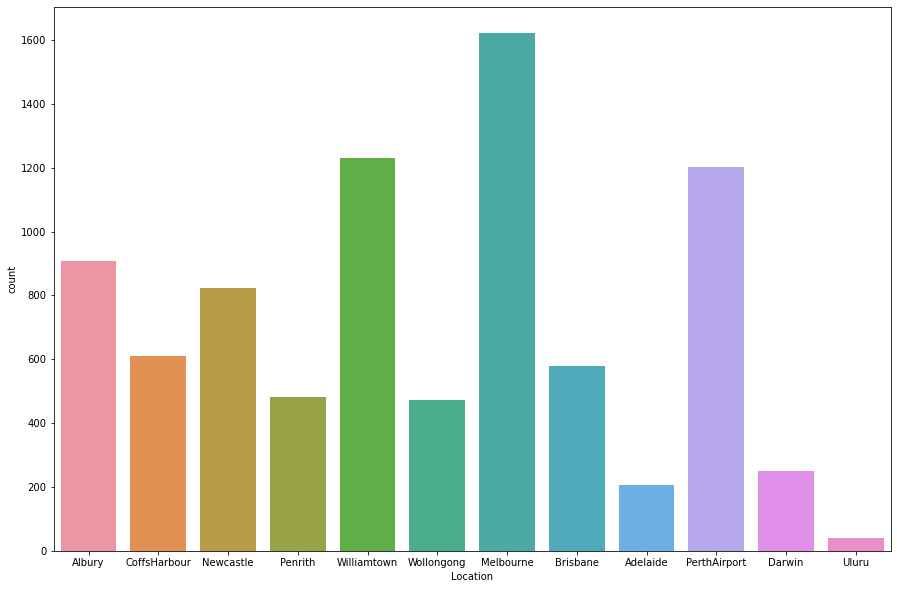

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(x='Location',data=df)

Text(0.5, 1.0, 'mintemp vs location')

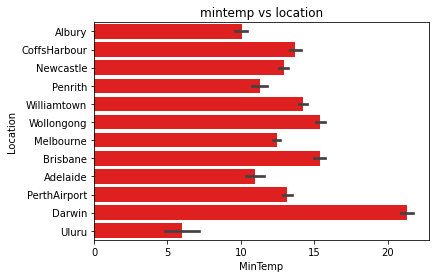

In [88]:
sns.barplot(x='MinTemp',y='Location',data=df,color='r',ci=95)
plt.title("mintemp vs location")

Text(0.5, 1.0, 'mintemp vs location')

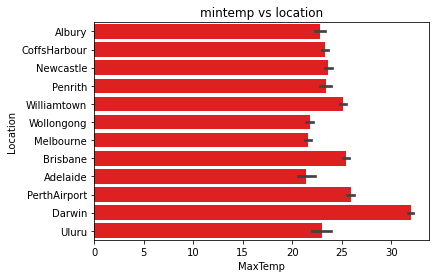

In [89]:
sns.barplot(x='MaxTemp',y='Location',data=df,color='r',ci=95)
plt.title("mintemp vs location")

Text(0.5, 1.0, 'rainfall vs location')

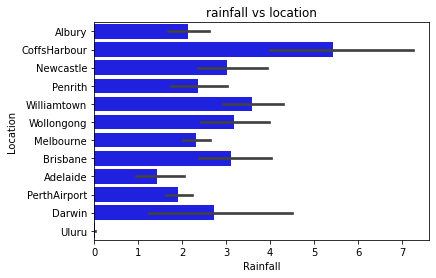

In [90]:
sns.barplot(x='Rainfall',y='Location',data=df,color='b',ci=95)
plt.title("rainfall vs location")

Text(0.5, 1.0, 'WindDir9am')

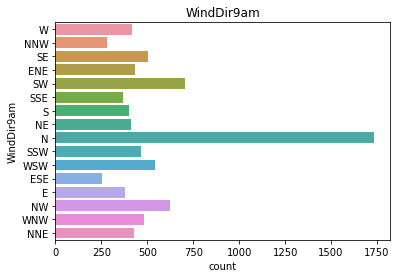

In [91]:
sns.countplot(y='WindDir9am',data=df)
plt.title("WindDir9am")

Text(0.5, 1.0, 'WindDir3pm')

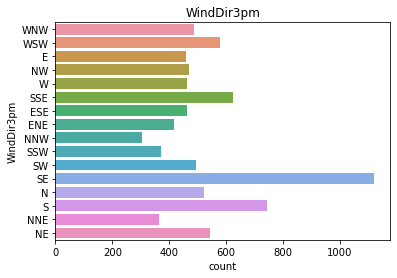

In [92]:
sns.countplot(y='WindDir3pm',data=df)
plt.title("WindDir3pm")

<AxesSubplot:xlabel='RainToday', ylabel='count'>

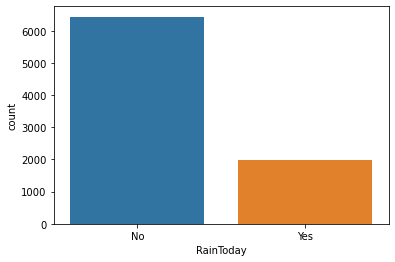

In [93]:
sns.countplot(x='RainToday',data=df)


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

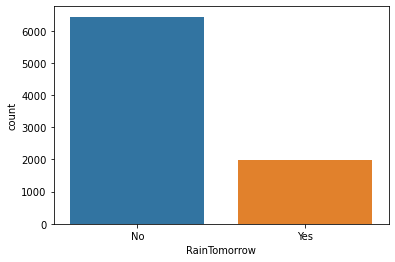

In [94]:
sns.countplot(x='RainTomorrow',data=df)


<AxesSubplot:xlabel='year', ylabel='Rainfall'>

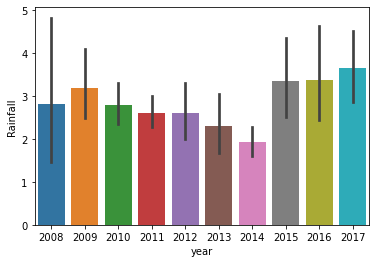

In [95]:
sns.barplot(y='Rainfall',x='year',data=df)


Text(0.5, 1.0, 'rainfall vs year and location')

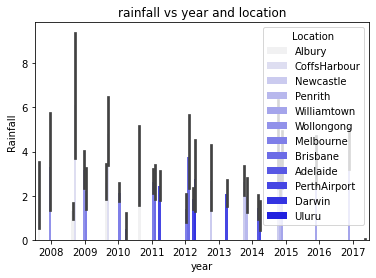

In [96]:
sns.barplot(y='Rainfall',x='year',data=df,color='b',ci=95,hue="Location")
plt.title("rainfall vs year and location")

# which the type of relationship to the features visulization


In [97]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

<AxesSubplot:xlabel='WindDir9am', ylabel='WindDir3pm'>

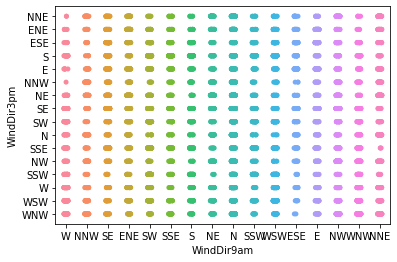

In [98]:
sns.stripplot(x ='WindDir9am', y ='WindDir3pm', data = df,
              jitter = True,  dodge = True)

<AxesSubplot:xlabel='WindDir9am', ylabel='WindDir3pm'>

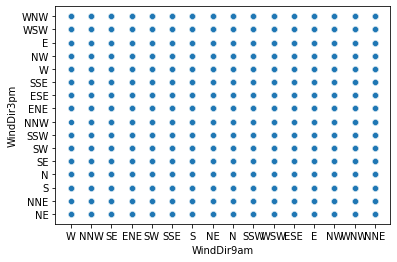

In [99]:
sns.scatterplot(x ='WindDir9am', y ='WindDir3pm', data = df)

<AxesSubplot:xlabel='MaxTemp', ylabel='RainToday'>

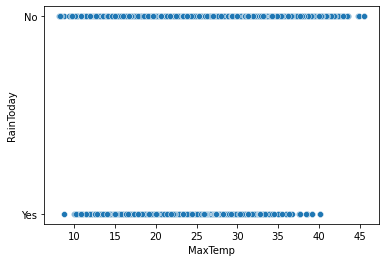

In [100]:
sns.scatterplot(x ='MaxTemp', y ='RainToday', data = df)


<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

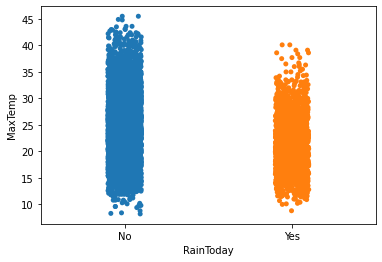

In [101]:
sns.stripplot(y ='MaxTemp', x ='RainToday', data = df,
              jitter = True,  dodge = True)

In [102]:
df['RainTomorrow'].value_counts()


No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

# distribution plot analysis


In [103]:
df.shape


(8425, 25)

In [104]:
plt.figure(figsize=(30,20))
plotnumber=1

<Figure size 2160x1440 with 0 Axes>

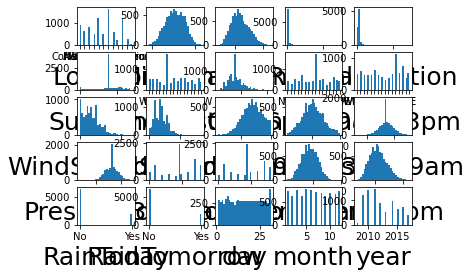

In [105]:
for column in df:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()    

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [107]:
df.drop(['Location','WindDir9am','WindDir3pm'],axis=1,inplace=True)


In [108]:
df.drop(['WindGustDir'],axis=1,inplace=True)


In [109]:
df


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,12,1,2008
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,12,2,2008
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,12,3,2008
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,12,4,2008
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
df['RainToday'] = le.fit_transform(df['RainToday']) 


In [112]:
le.inverse_transform([0,1])


array(['No', 'Yes'], dtype=object)

In [113]:
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])


In [114]:
le.inverse_transform([0,1])


array(['No', 'Yes'], dtype=object)

In [115]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.6,5.389395,7.632205,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,7.4,25.1,0.0,5.389395,7.632205,44.0,4.0,22.0,44.0,25.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008
2,12.9,25.7,0.0,5.389395,7.632205,46.0,19.0,26.0,38.0,30.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3,2008
3,9.2,28.0,0.0,5.389395,7.632205,24.0,11.0,9.0,45.0,16.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,12,4,2008
4,17.5,32.3,1.0,5.389395,7.632205,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008


In [116]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8425 non-null   float64
 1   MaxTemp        8425 non-null   float64
 2   Rainfall       8425 non-null   float64
 3   Evaporation    8425 non-null   float64
 4   Sunshine       8425 non-null   float64
 5   WindGustSpeed  8425 non-null   float64
 6   WindSpeed9am   8425 non-null   float64
 7   WindSpeed3pm   8425 non-null   float64
 8   Humidity9am    8425 non-null   float64
 9   Humidity3pm    8425 non-null   float64
 10  Pressure9am    8425 non-null   float64
 11  Pressure3pm    8425 non-null   float64
 12  Cloud9am       8425 non-null   float64
 13  Cloud3pm       8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8425 non-null   int32  
 17  RainTomorrow   8425 non-null   int32  
 18  day     

# chek the target variable has imbalance data¶


In [117]:
from sklearn.utils import resample


In [118]:
df_majority = df[(df['RainTomorrow']==0)] 
df_minority = df[(df['RainTomorrow']==1)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 6434, 
                                 random_state=42)  
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [119]:
df_upsampled['RainTomorrow'].value_counts()


1    6434
0    6434
Name: RainTomorrow, dtype: int64

In [120]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.6,5.389395,7.632205,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,7.4,25.1,0.0,5.389395,7.632205,44.0,4.0,22.0,44.0,25.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008
2,12.9,25.7,0.0,5.389395,7.632205,46.0,19.0,26.0,38.0,30.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3,2008
3,9.2,28.0,0.0,5.389395,7.632205,24.0,11.0,9.0,45.0,16.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,12,4,2008
4,17.5,32.3,1.0,5.389395,7.632205,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008


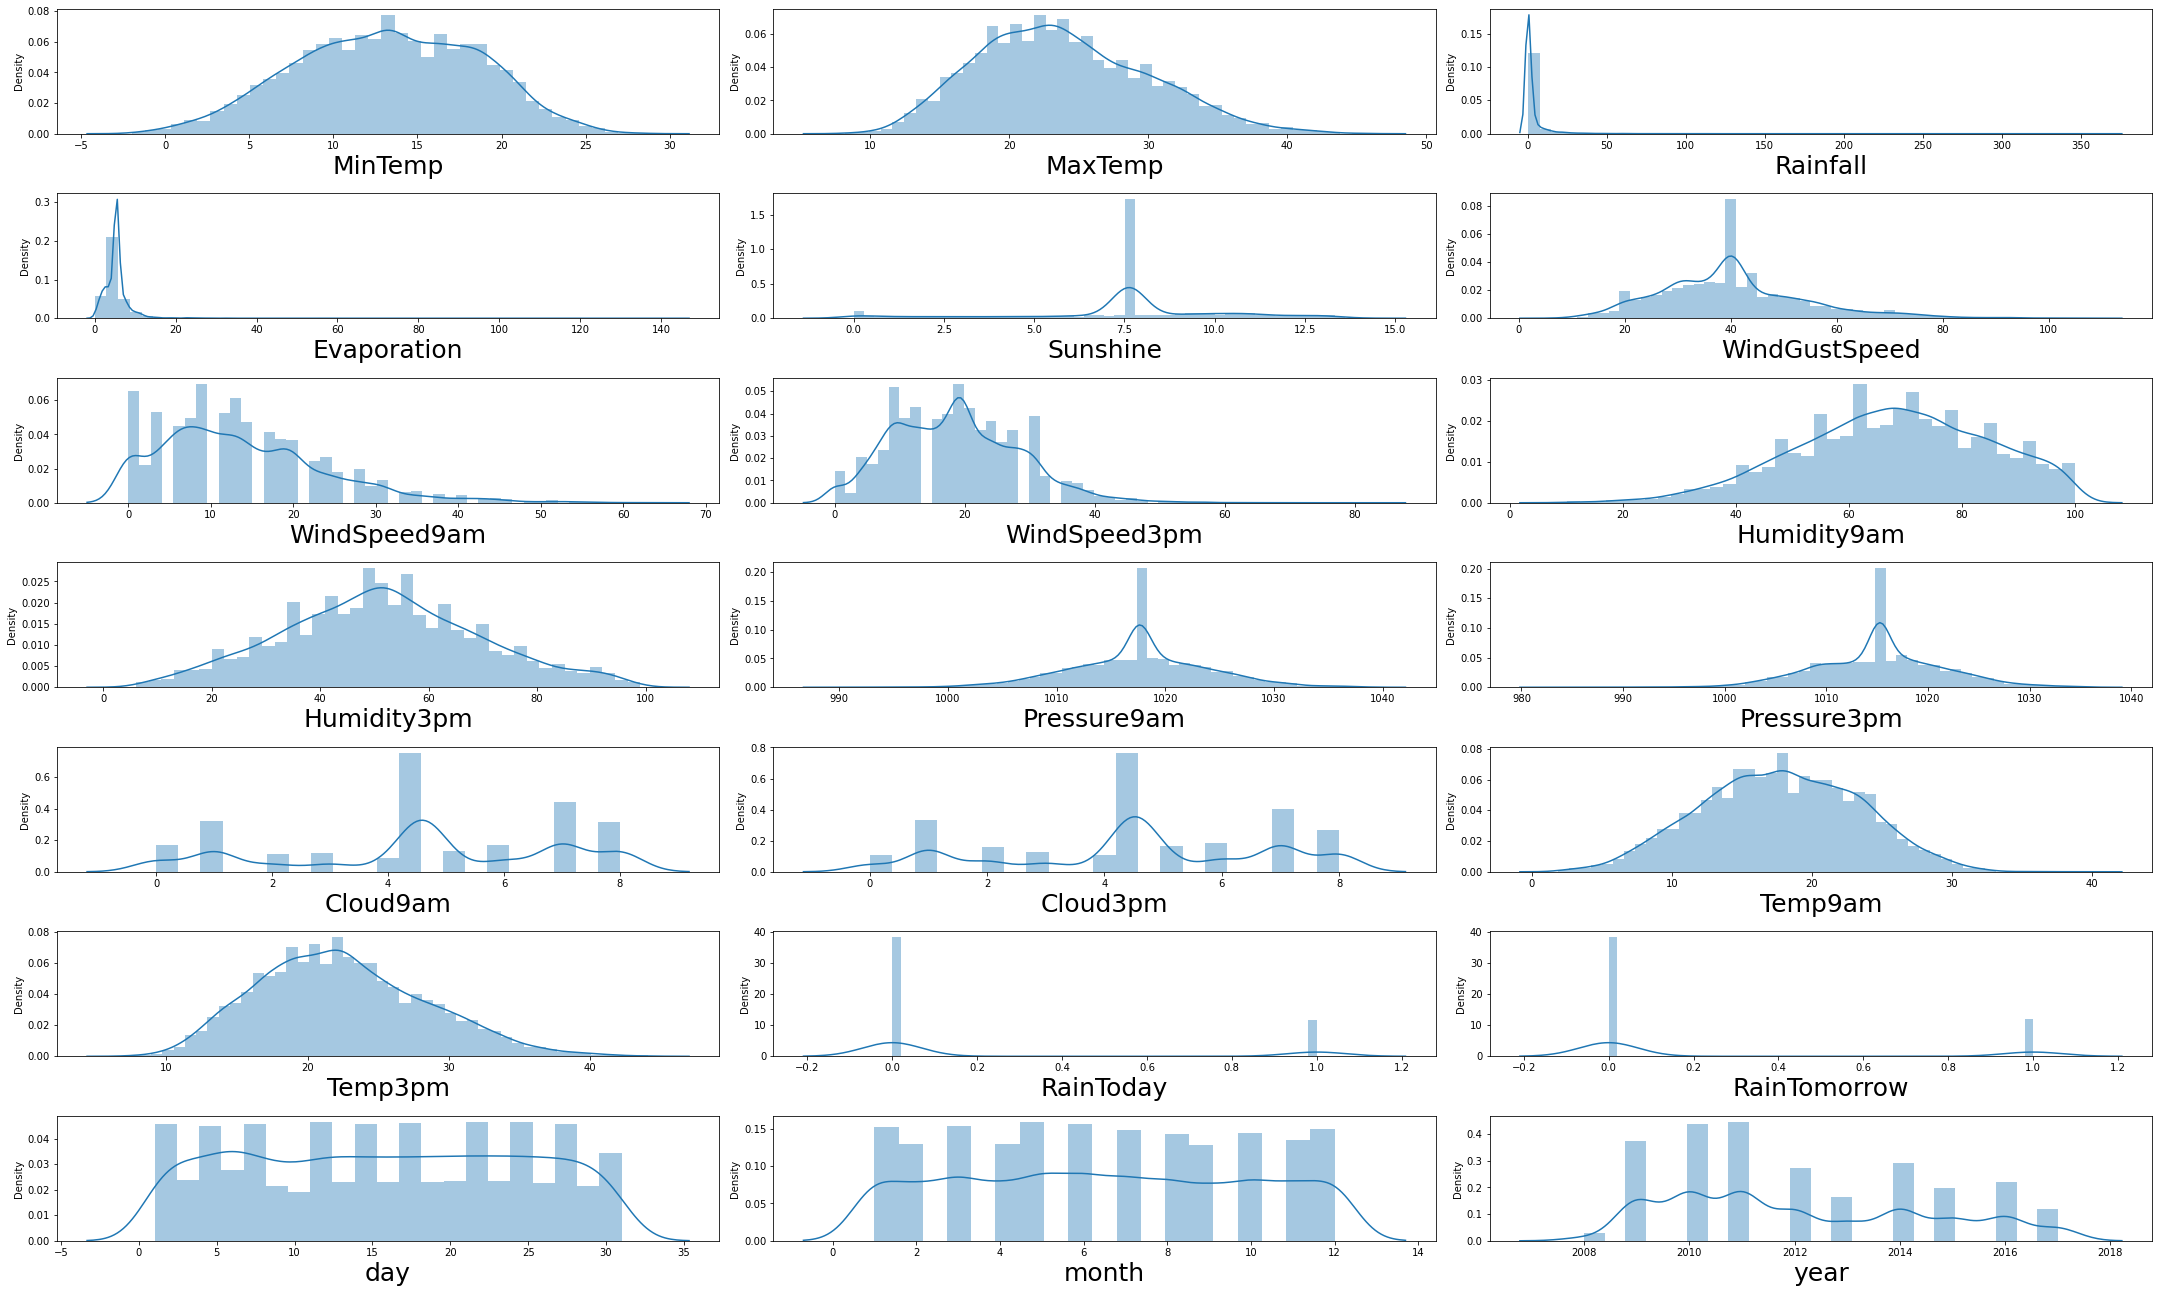

In [121]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()  

In [122]:
#plt.figure(figsize=(15,15))
#sns.pairplot(df , palette ='coolwarm')

In [123]:
plt.savefig("squares.png")


<Figure size 432x288 with 0 Axes>

In [124]:
#plt.savefig("squares.png") save the disgram 


# chek the skew


In [126]:
df.skew()


MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
day               0.004615
month             0.022472
year              0.418663
dtype: float64

In [127]:
sk = df.skew()


In [128]:
sk[np.abs(sk)<0.5].all()


True

In [129]:
df['Rainfall'] =np.sqrt(df['Rainfall'])


In [130]:
df['Evaporation'] = np.sqrt(df['Evaporation'])


In [131]:
df['WindGustSpeed'] = np.sqrt(df['WindGustSpeed'])


In [132]:
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])


In [133]:
df.skew()


MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         2.880118
Evaporation      1.645178
Sunshine        -0.716525
WindGustSpeed    0.176622
WindSpeed9am    -0.414330
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
day              0.004615
month            0.022472
year             0.418663
dtype: float64

In [134]:
sk1 = df.skew()


In [135]:
sk1[np.abs(sk1)<0.5].all()


True

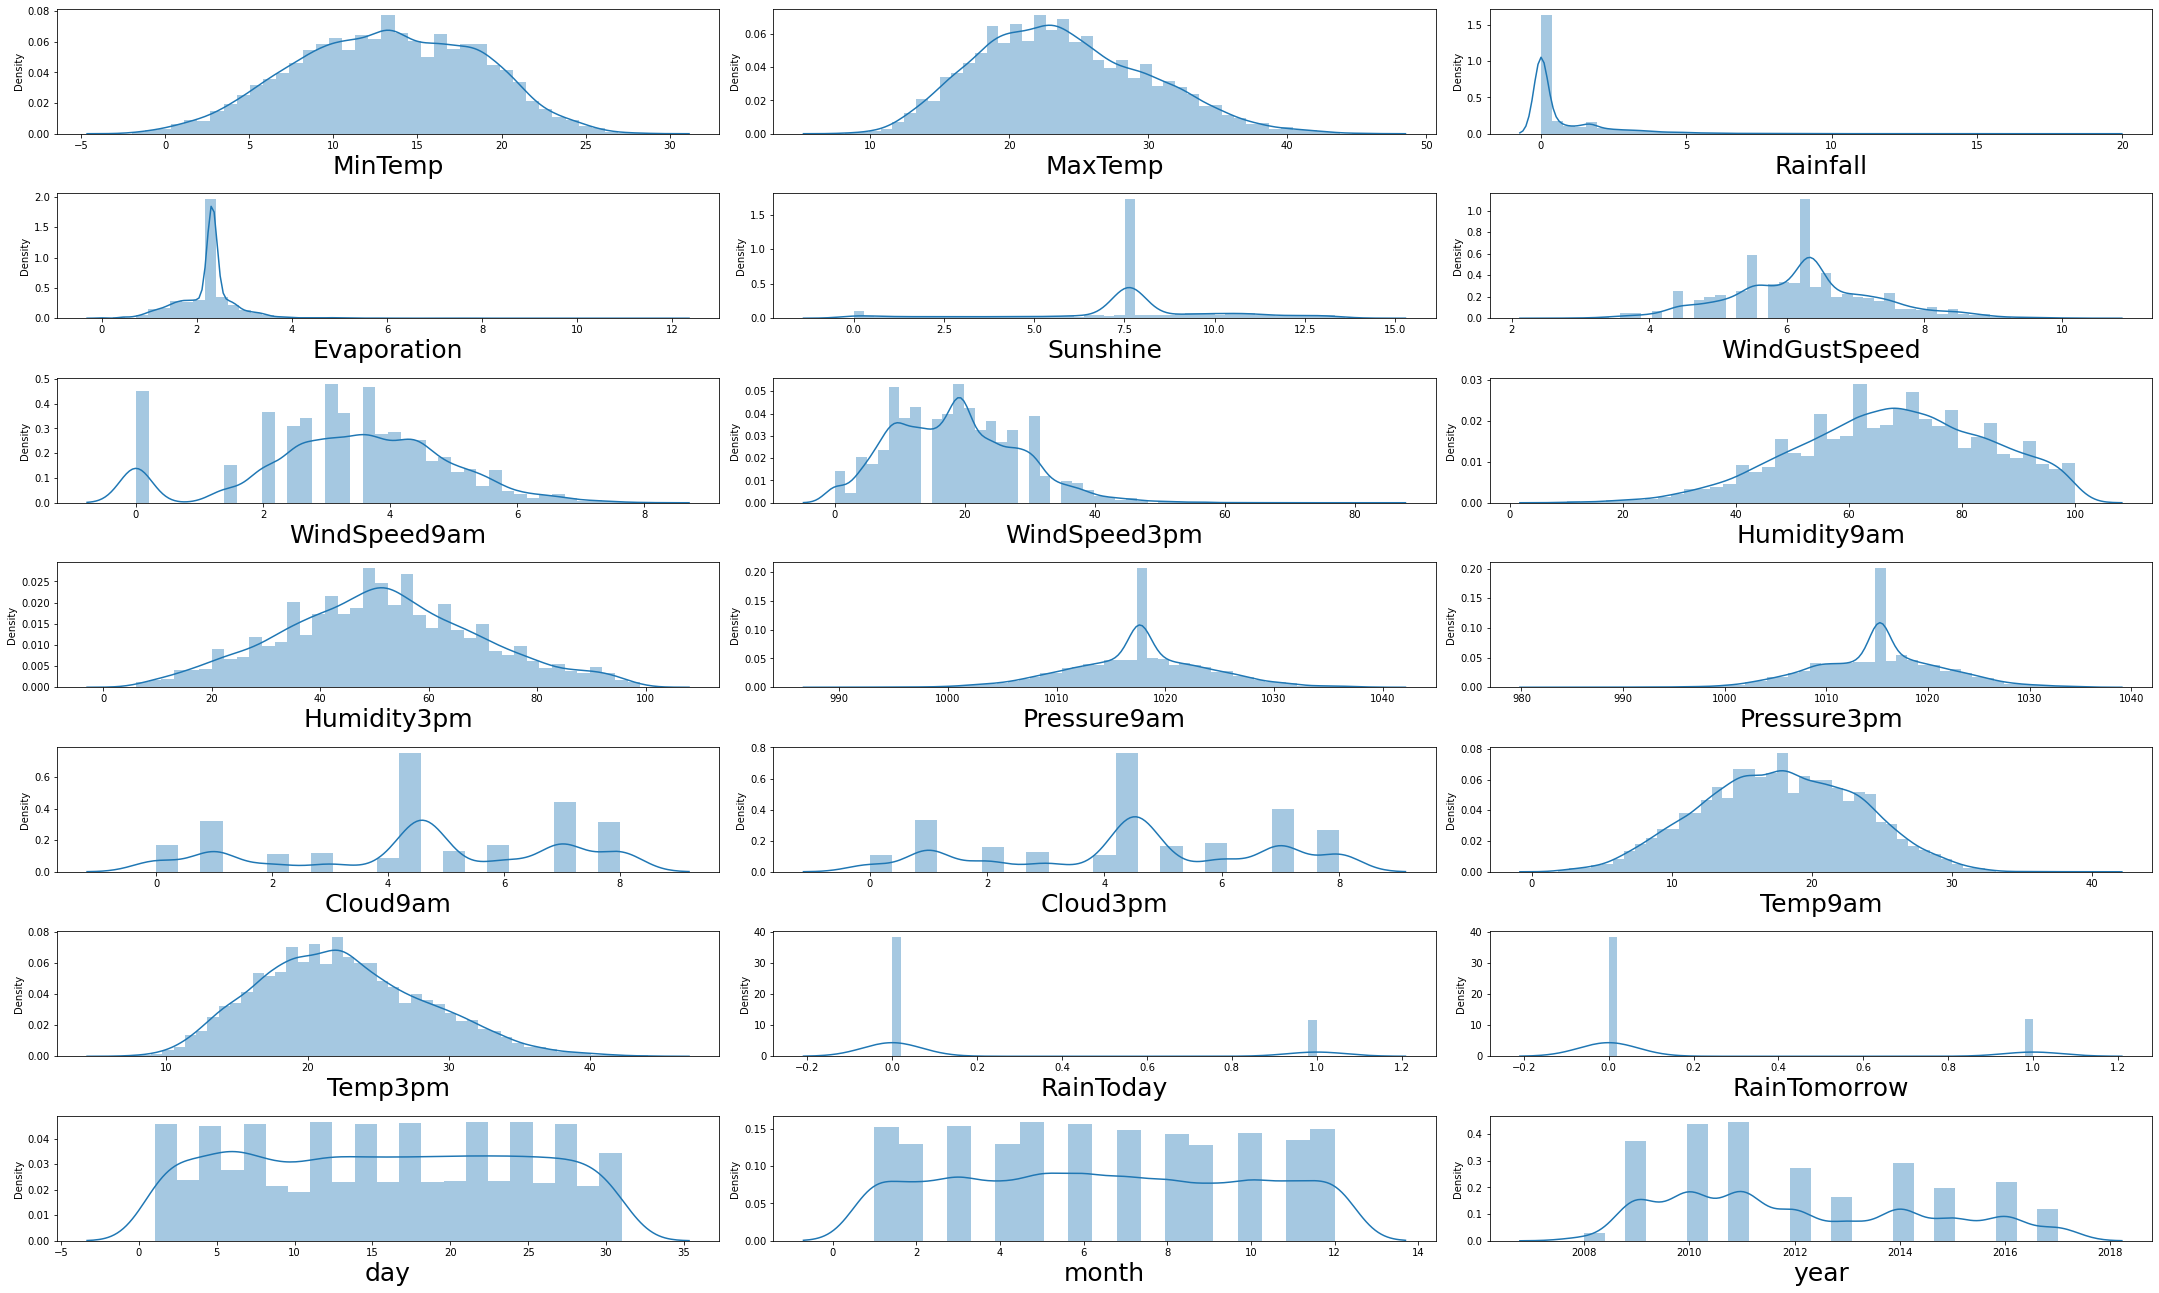

In [136]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()

In [137]:
df.head(2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.774597,2.321507,7.632205,6.63325,4.472136,24.0,71.0,22.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,7.4,25.1,0.000000,2.321507,7.632205,6.63325,2.000000,22.0,44.0,25.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008


# check the outliers


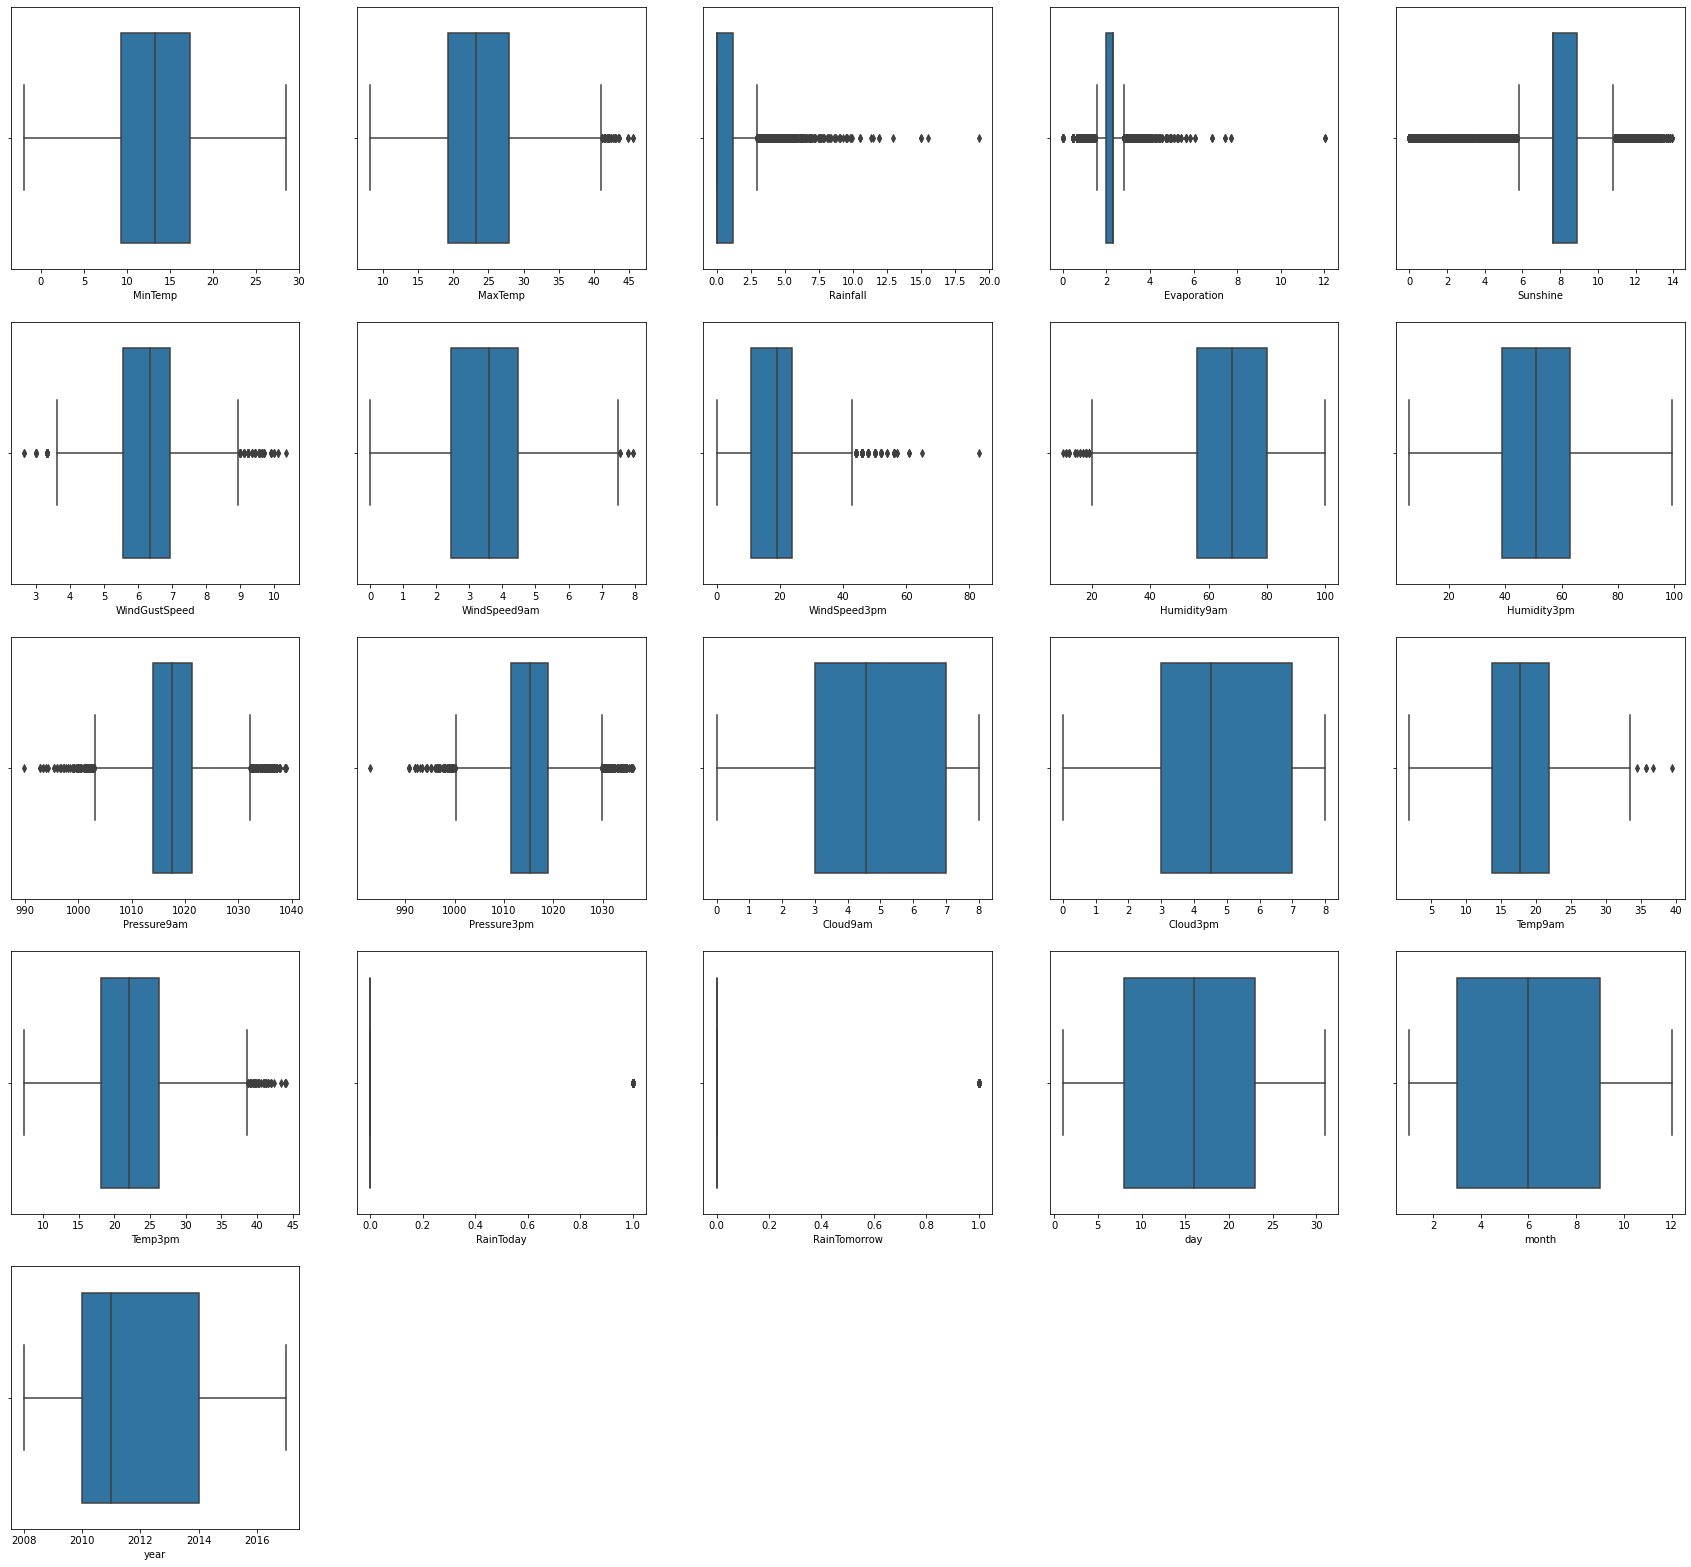

In [138]:
plt.figure(figsize=(30,28))
graph = 1
for column in df:
    if graph<=25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [139]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(8425, 21)

In [140]:
threshold = 3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   67,   68,   68,  123,  296,  296,  381,  381,  405,  406,
        407,  407,  431,  462,  544,  563,  568,  568,  569,  602,  683,
        683,  684,  699,  713,  748,  748,  770,  796,  797,  802,  803,
        928,  935,  949,  951,  979,  980, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1187, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357,
       1358, 1387, 1411, 1412, 1413, 1479, 1480, 1481, 1501, 1513, 1514,
       1587, 1644, 1661, 1665, 1673, 1680, 1774, 1782, 1811, 1819, 1873,
       1898, 1954, 2028, 2043, 2063, 2108, 2116, 2182, 2183, 2201, 2211,
       2219, 2230, 2231, 2265, 2346, 2373, 2389, 2429, 2488, 2505, 2510,
       2527, 2527, 2541, 2593, 2676, 2677, 2710, 2735, 2738, 2743, 2744,
       2768, 2827, 2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883,
       2886, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919,
       2925, 2933, 2939, 2947, 2953, 2961, 2967, 2

In [141]:
data_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(data_new.shape)

(8425, 21)
(8000, 21)


In [142]:
loss_percent = (8425-8115)/8115*100
print(loss_percent)

3.820086260012323


In [143]:
data_new.isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [144]:
data_new.head(2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.774597,2.321507,7.632205,6.63325,4.472136,24.0,71.0,22.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1,2008
1,7.4,25.1,0.000000,2.321507,7.632205,6.63325,2.000000,22.0,44.0,25.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2,2008


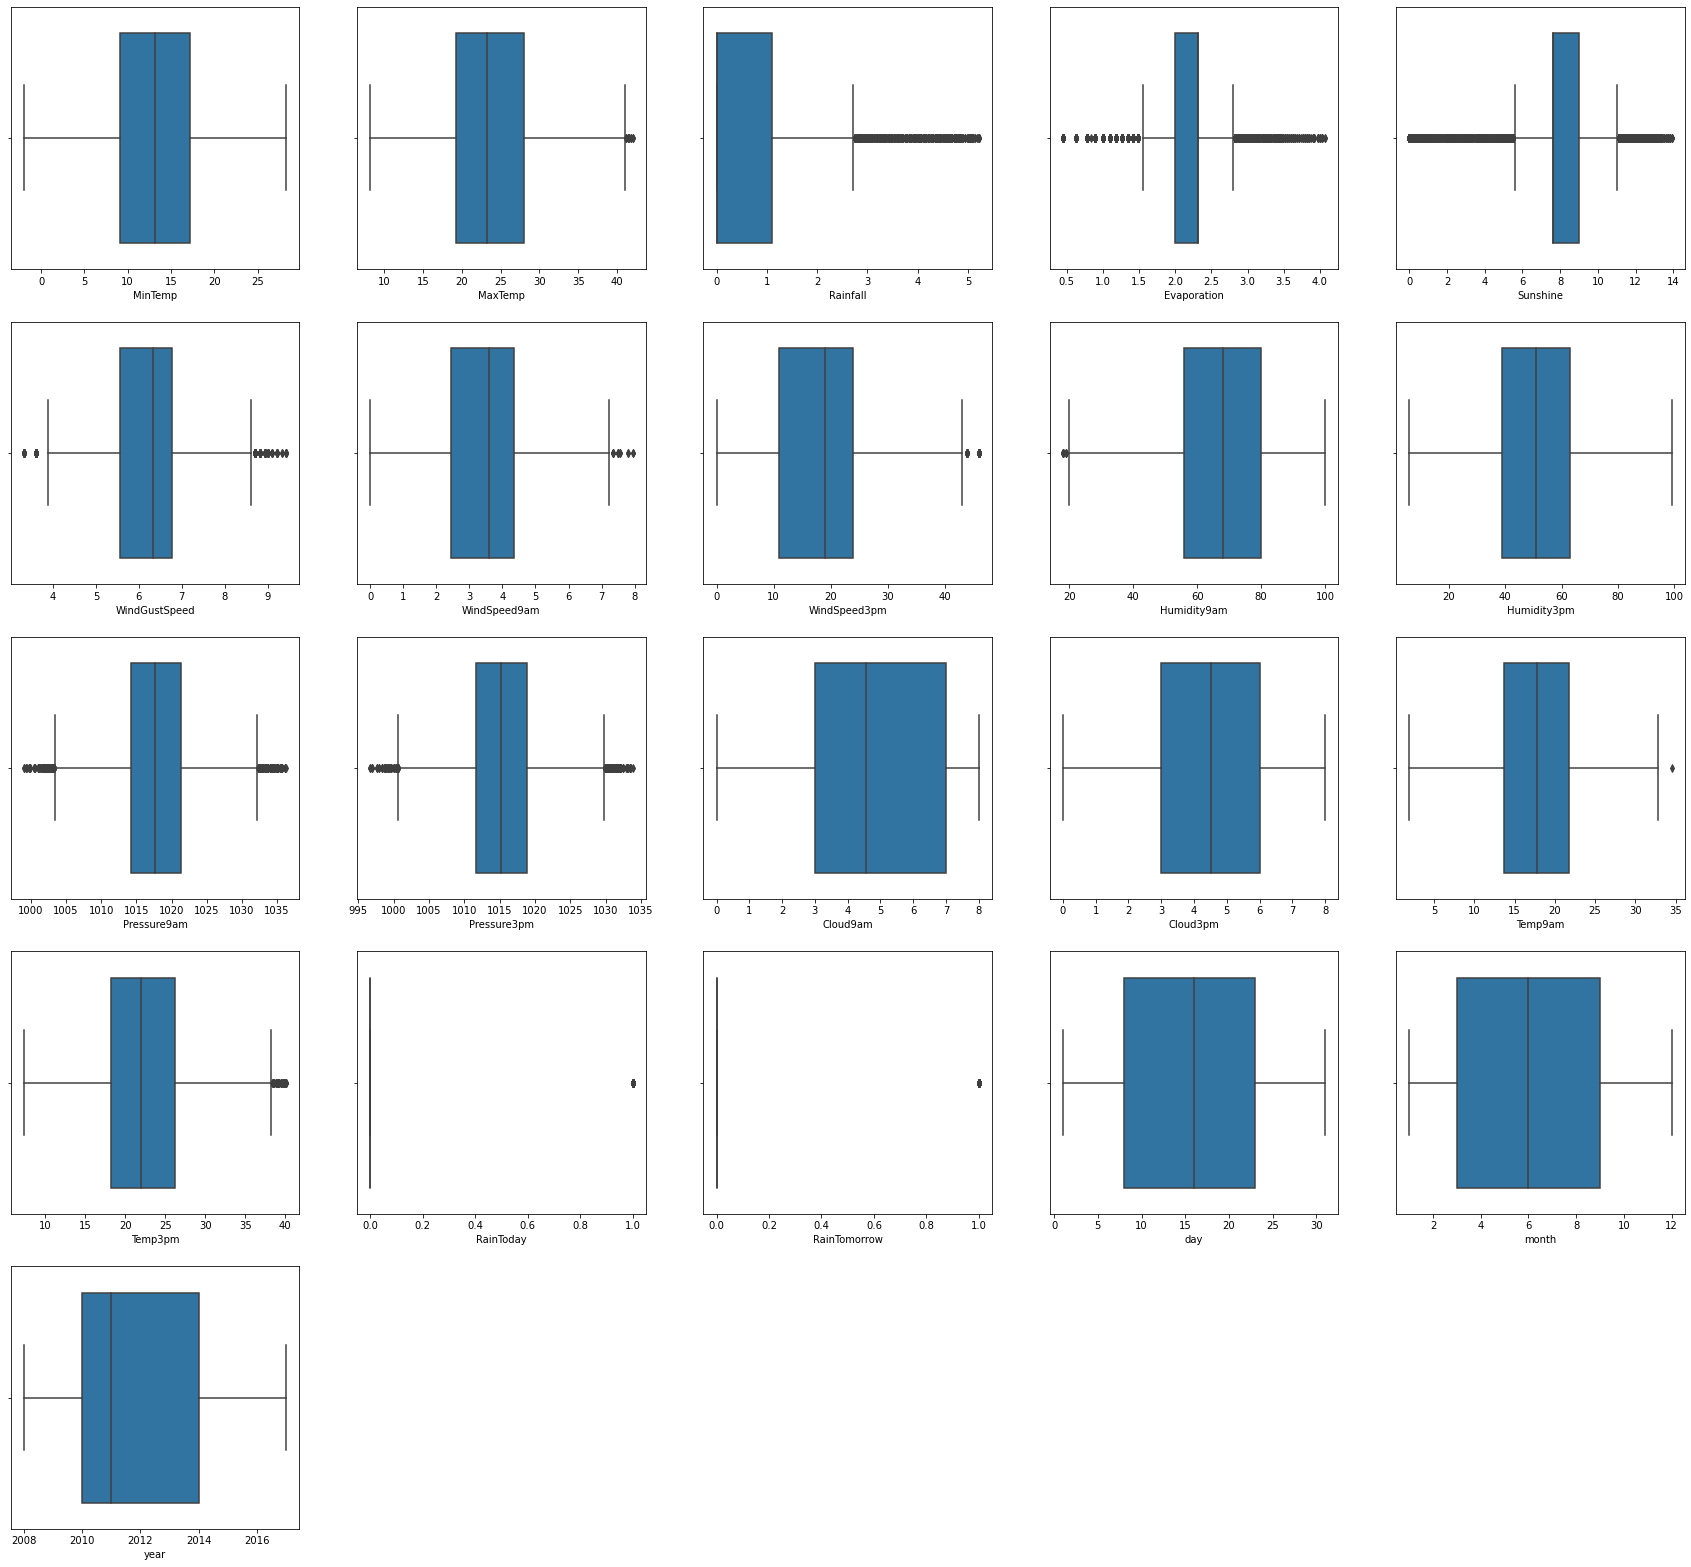

In [145]:
plt.figure(figsize=(30,28))
graph = 1
for column in data_new:
    if graph<=25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(data_new[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

# check the static analysis


In [146]:
data_new.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
MinTemp,1.000000,0.719201,0.079702,0.370872,0.066602,0.243466,0.168446,0.184760,-0.130782,0.083903,...,-0.424100,0.084669,0.033264,0.888180,0.688129,0.055235,0.087392,-0.031362,-0.128116,0.038166
MaxTemp,0.719201,1.000000,-0.207629,0.468849,0.386026,0.151812,0.033547,0.093348,-0.381709,-0.411977,...,-0.410280,-0.254193,-0.248609,0.865133,0.974901,-0.219925,-0.148004,-0.011051,-0.083681,0.117987
Rainfall,0.079702,-0.207629,1.000000,-0.164003,-0.232750,0.089452,0.039235,0.036397,0.375775,0.350935,...,-0.039907,0.276918,0.235242,-0.084055,-0.217348,0.849608,0.309899,-0.010607,0.000686,0.015270
Evaporation,0.370872,0.468849,-0.164003,1.000000,0.375537,0.186844,0.072794,0.090168,-0.315327,-0.226172,...,-0.275559,-0.110102,-0.138877,0.439497,0.455699,-0.167926,-0.084717,-0.008076,-0.000907,0.136649
Sunshine,0.066602,0.386026,-0.232750,0.375537,1.000000,0.014991,-0.005693,0.042826,-0.358134,-0.435673,...,-0.055034,-0.528874,-0.543061,0.260023,0.402699,-0.215733,-0.316223,-0.000405,0.008117,0.056151
WindGustSpeed,0.243466,0.151812,0.089452,0.186844,0.014991,1.000000,0.525975,0.638663,-0.289083,-0.101485,...,-0.341706,0.005142,0.063573,0.216913,0.118030,0.066035,0.170281,0.001823,0.047468,-0.027226
WindSpeed9am,0.168446,0.033547,0.039235,0.072794,-0.005693,0.525975,1.000000,0.548855,-0.378678,-0.104922,...,-0.119492,-0.008264,0.041073,0.145952,0.016930,0.029984,0.058448,-0.008334,0.036913,-0.108711
WindSpeed3pm,0.184760,0.093348,0.036397,0.090168,0.042826,0.638663,0.548855,1.000000,-0.253690,-0.087971,...,-0.187130,0.002478,0.001611,0.189320,0.071543,0.016679,0.045283,-0.011239,0.048206,-0.063818
Humidity9am,-0.130782,-0.381709,0.375775,-0.315327,-0.358134,-0.289083,-0.378678,-0.253690,1.000000,0.625132,...,0.171253,0.398158,0.291988,-0.372059,-0.375149,0.355391,0.259531,-0.005383,-0.084380,0.106736
Humidity3pm,0.083903,-0.411977,0.350935,-0.226172,-0.435673,-0.101485,-0.104922,-0.087971,0.625132,1.000000,...,0.066116,0.411736,0.431974,-0.119790,-0.481289,0.336483,0.437480,0.004440,-0.040393,-0.029217


<AxesSubplot:>

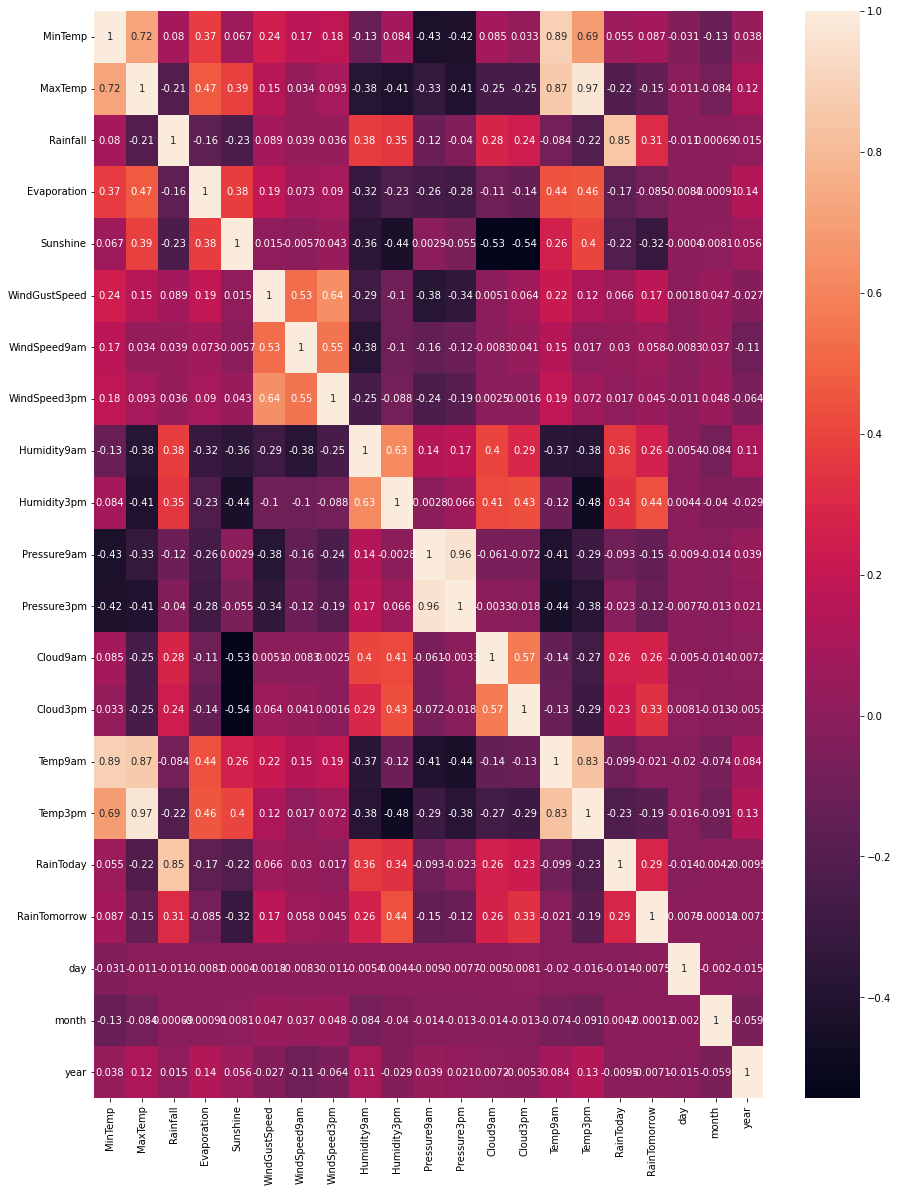

In [147]:
plt.figure(figsize=(15,20))
sns.heatmap(data_new.corr(),annot=True)

# data split testing and traning phase


In [148]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [149]:
x.drop(['Temp3pm','Pressure9am','MaxTemp'],axis=1,inplace=True)


# preprocessing


In [150]:
from sklearn.preprocessing import StandardScaler


In [151]:
sc = StandardScaler()


In [152]:
x_scaled = sc.fit_transform(x)


In [153]:
x_scaled.shape[1]


17

In [154]:
vif = pd.DataFrame()


In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [156]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]


In [157]:
vif['features'] = x.columns


In [158]:
vif

,vif,features
0,8.081037,MinTemp
1,2.785022,Rainfall
2,1.404407,Evaporation
3,1.880359,Sunshine
4,2.148254,WindGustSpeed
5,1.826329,WindSpeed9am
6,1.924409,WindSpeed3pm
7,3.044836,Humidity9am
8,2.107199,Humidity3pm
9,1.421632,Pressure3pm


In [159]:
x.head()


,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,day,month,year
0,13.4,0.774597,2.321507,7.632205,6.633250,4.472136,24.0,71.0,22.0,1007.1,8.000000,4.503183,16.9,0,12,1,2008
1,7.4,0.000000,2.321507,7.632205,6.633250,2.000000,22.0,44.0,25.0,1007.8,4.566622,4.503183,17.2,0,12,2,2008
2,12.9,0.000000,2.321507,7.632205,6.782330,4.358899,26.0,38.0,30.0,1008.7,4.566622,2.000000,21.0,0,12,3,2008
3,9.2,0.000000,2.321507,7.632205,4.898979,3.316625,9.0,45.0,16.0,1012.8,4.566622,4.503183,18.1,0,12,4,2008
4,17.5,1.000000,2.321507,7.632205,6.403124,2.645751,20.0,82.0,33.0,1006.0,7.000000,8.000000,17.8,0,12,5,2008


# features selection


In [160]:
from sklearn.feature_selection import SelectKBest,f_classif


In [161]:
best_features = SelectKBest(score_func=f_classif,k=17)
fit = best_features.fit(x,y)
x_scores = pd.DataFrame(fit.scores_)
x_columns = pd.DataFrame(x.columns)

In [162]:
feature_scores = pd.concat([x_scores,x_columns],axis=1)
feature_scores.columns = ['Score','Feature_Name']#put the column nme

In [163]:
print(feature_scores.nlargest(17,'Score'))


          Score   Feature_Name
8   2077.580374    Humidity3pm
11  1133.279550       Cloud3pm
3   1013.558821       Sunshine
1   1010.994442       Rainfall
13   914.359293      RainToday
10   710.684993       Cloud9am
7    668.806828    Humidity9am
4    293.095720  WindGustSpeed
9    156.930342    Pressure3pm
0     73.393560        MinTemp
2     50.343025    Evaporation
5     35.026406   WindSpeed9am
6     24.239735   WindSpeed3pm
12     4.540288        Temp9am
14     1.655175            day
16     1.031535           year
15     0.195639          month


# model selection and find random state


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [166]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum accuracy score is ",maxAccu," on Random_state ",maxRS)

Maximum accuracy score is  0.8469145569620253  on Random_state  63


In [167]:
confusion_mat = confusion_matrix(y_test,pred)


In [168]:
confusion_mat


array([[1816,  114],
       [ 324,  274]], dtype=int64)

In [169]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1930
           1       0.71      0.46      0.56       598

    accuracy                           0.83      2528
   macro avg       0.78      0.70      0.72      2528
weighted avg       0.81      0.83      0.81      2528



# decision tree model


In [171]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


83.62341772151899
[[1710  220]
 [ 194  404]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1930
           1       0.65      0.68      0.66       598

    accuracy                           0.84      2528
   macro avg       0.77      0.78      0.78      2528
weighted avg       0.84      0.84      0.84      2528



# RandomForestClassifier


In [172]:
from sklearn.ensemble import RandomForestClassifier
rr = RandomForestClassifier()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

88.01424050632912
[[1854   76]
 [ 227  371]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1930
           1       0.83      0.62      0.71       598

    accuracy                           0.88      2528
   macro avg       0.86      0.79      0.82      2528
weighted avg       0.88      0.88      0.87      2528



# support vector classifier


In [173]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.01898734177216
[[1842   88]
 [ 316  282]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1930
           1       0.76      0.47      0.58       598

    accuracy                           0.84      2528
   macro avg       0.81      0.71      0.74      2528
weighted avg       0.83      0.84      0.83      2528



# knn classifier


In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

82.12025316455697
[[1792  138]
 [ 314  284]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1930
           1       0.67      0.47      0.56       598

    accuracy                           0.82      2528
   macro avg       0.76      0.70      0.72      2528
weighted avg       0.81      0.82      0.81      2528



# bagging classifier


In [175]:
from sklearn.ensemble import BaggingClassifier


In [176]:
bagg_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,random_state=63,oob_score=True)


In [177]:
bagg_knn.fit(x_train,y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=9, oob_score=True, random_state=63)

In [178]:
bagg_knn.score(x_test,y_test)


0.8200158227848101

# check ensemble


In [179]:
bagg_rf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=9,max_samples=0.8,bootstrap=True,random_state=63,oob_score=True)


In [180]:
bagg_rf.fit(x_train,y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=9, oob_score=True, random_state=63)

In [181]:
bagg_rf.score(x_train,y_train)


0.9579447176530439

In [182]:
bagg_rf.score(x_test,y_test)


0.867879746835443

# best accuracy model random forest


# cross validation check the overfitting


In [183]:
from sklearn.model_selection import KFold ,cross_val_score

k_f = KFold(n_splits=4,shuffle=True)

k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [184]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
   print("train = ",train,"test = ",test)

train =  [0 1 2 4 5 7 9] test =  [3 6 8]
train =  [0 1 3 5 6 8 9] test =  [2 4 7]
train =  [0 2 3 4 5 6 7 8] test =  [1 9]
train =  [1 2 3 4 6 7 8 9] test =  [0 5]


In [185]:
cross_val_score(knn,x_scaled,y,cv=10)


array([0.81257414, 0.80782918, 0.77105575, 0.77580071, 0.84341637,
       0.84679335, 0.85866983, 0.80760095, 0.82660333, 0.82897862])

In [186]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()


0.804154302670623

In [187]:
#random forest
cross_val_score(rr,x_scaled,y,cv=10)

array([0.83985765, 0.84104389, 0.80189798, 0.90154211, 0.99525504,
       1.        , 0.99287411, 0.92517815, 0.85273159, 0.86460808])

In [188]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=5).mean()


0.855786350148368

In [189]:
#check desicion tree
cross_val_score(dt,x_scaled,y,cv=10)

array([0.76749703, 0.71174377, 0.74495848, 0.886121  , 0.9881376 ,
       1.        , 0.98574822, 0.84441805, 0.78266033, 0.8111639 ])

In [190]:
cross_val_score(DecisionTreeClassifier(),x_scaled,y,cv=5).mean()


0.7953709198813057

In [191]:
#logistic regression
cross_val_score(mod,x_scaled,y,cv=10)

array([0.85053381, 0.85053381, 0.77698695, 0.78054567, 0.80071174,
       0.78978622, 0.81353919, 0.82422803, 0.86342043, 0.86223278])

In [192]:
cross_val_score(LogisticRegression(),x_scaled,y,cv=10).mean()


0.821251863185152

# best cross validation score model random forest


# hyperparameter tunnig


In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [194]:
parameters = {'criterion':{"gini", "entropy"},
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':int,
             'max_depth':int}

In [195]:
RandomForest = RandomForestClassifier(criterion = 'gini', max_features = 'log2')
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = accuracy_score(y_test,pred_decision)
print('accuracy Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

accuracy Score: 88.05379746835443
Cross Val Score: 85.73293768545994


In [196]:
clf = RandomForestClassifier()

In [197]:
params= {'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}

In [198]:
grid = GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_param',grid.best_params_)

best_param {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [199]:
clf = grid.best_estimator_


In [200]:
clf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [201]:
y_pred = clf.predict(x_test)

rf_con_mat = confusion_matrix(y_test,y_pred)

In [202]:
rf_con_mat


array([[1851,   79],
       [ 288,  310]], dtype=int64)

In [203]:
accuracy_score(y_test,y_pred)


0.8548259493670886

In [204]:
report = classification_report(y_test,y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1930
           1       0.80      0.52      0.63       598

    accuracy                           0.85      2528
   macro avg       0.83      0.74      0.77      2528
weighted avg       0.85      0.85      0.84      2528



# lets roc auc curve choose best model


In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve


In [206]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [207]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print('model trained')

model trained


In [208]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)
print('model tested')

model tested


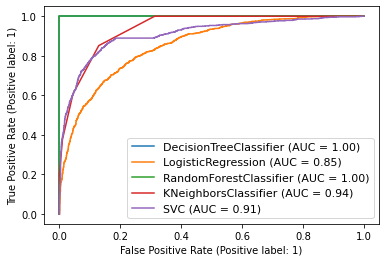

In [209]:
disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

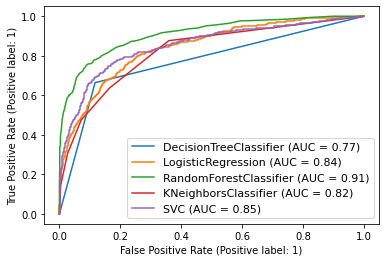

In [210]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()